# WCNN: Deep Learning based Optimal Feature Subset Selection by Wrapper Method for Prediction using CNN

### 4 Feature Normalization, Backward Feature selction(boruta) , Eliminating 2 features (the only change in data preprocessing [ one hot encoding] for categorical data)

## Loading the libaraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
dataset=pd.read_csv("heart.csv")

In [3]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The problem statement is of binary classification and the graphs show that there is no need of handling imbalance in terms of output(target) variable


 Target Class: 



1    526
0    499
Name: target, dtype: int64

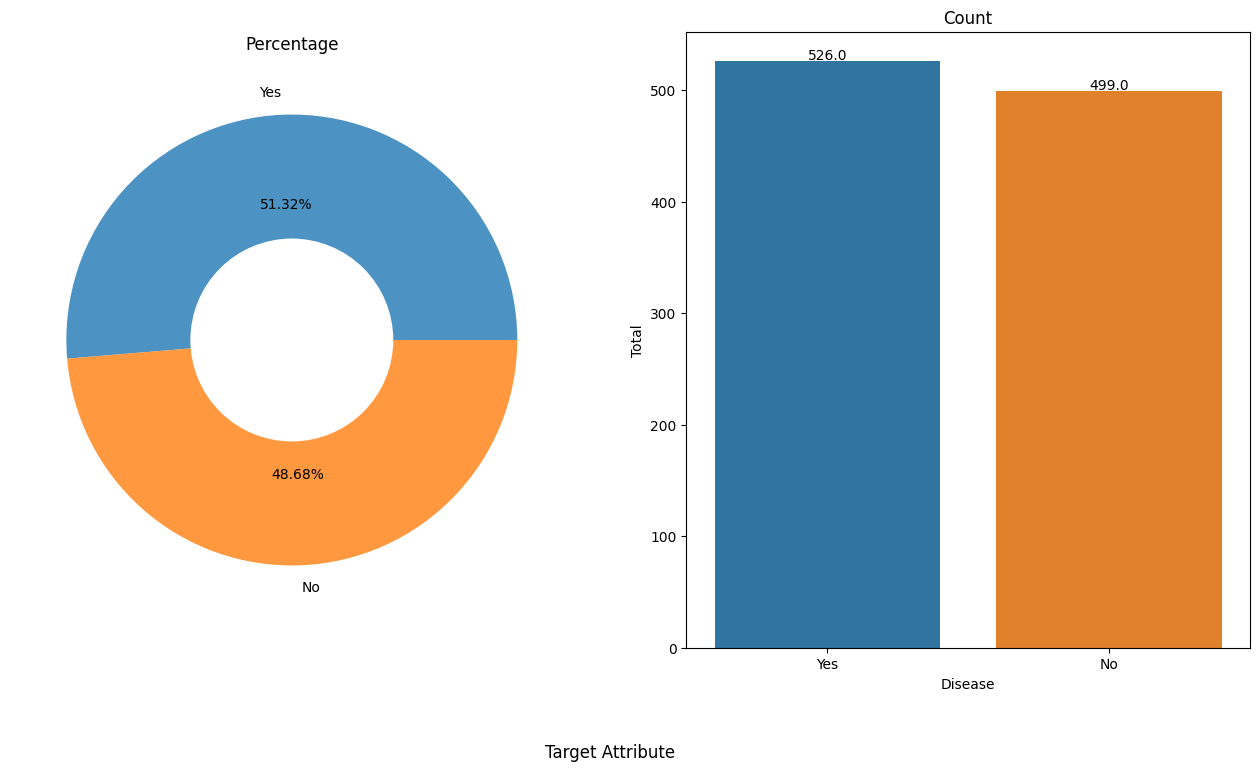

In [5]:
labels=['Yes', 'No']
order=dataset['target'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Target Attribute',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['target'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='target',data=dataset,order=order)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.xlabel('Disease')
plt.xticks([0,1],['Yes','No'])

plt.ylabel('Total')
countplt

print("The problem statement is of binary classification and the graphs show that there is no need of handling imbalance in terms of output(target) variable\n")
# Count Categorical Labels without dropping Null Values
print('\n Target Class: \n')
dataset.target.value_counts(dropna=False)



 Gender: 



1    713
0    312
Name: sex, dtype: int64

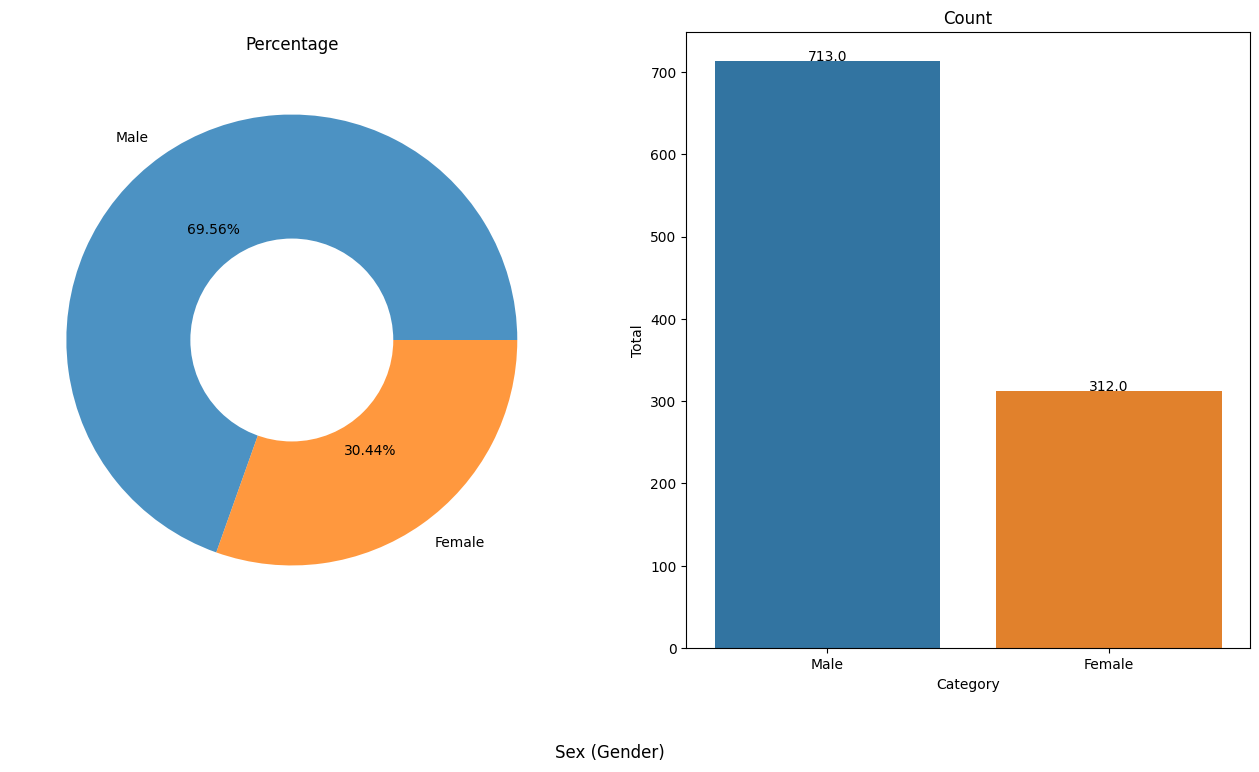

In [6]:
labels=['Male','Female']
order=dataset['sex'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Sex (Gender)',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['sex'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='sex',data=dataset,order=order)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)
# plt.xlabel('Gender')
plt.xticks([0,1],['Male','Female'])
plt.xlabel('Category')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Gender: \n')
dataset.sex.value_counts(dropna=False)



 Chest Pain Type Total: 



0    497
2    284
1    167
3     77
Name: cp, dtype: int64

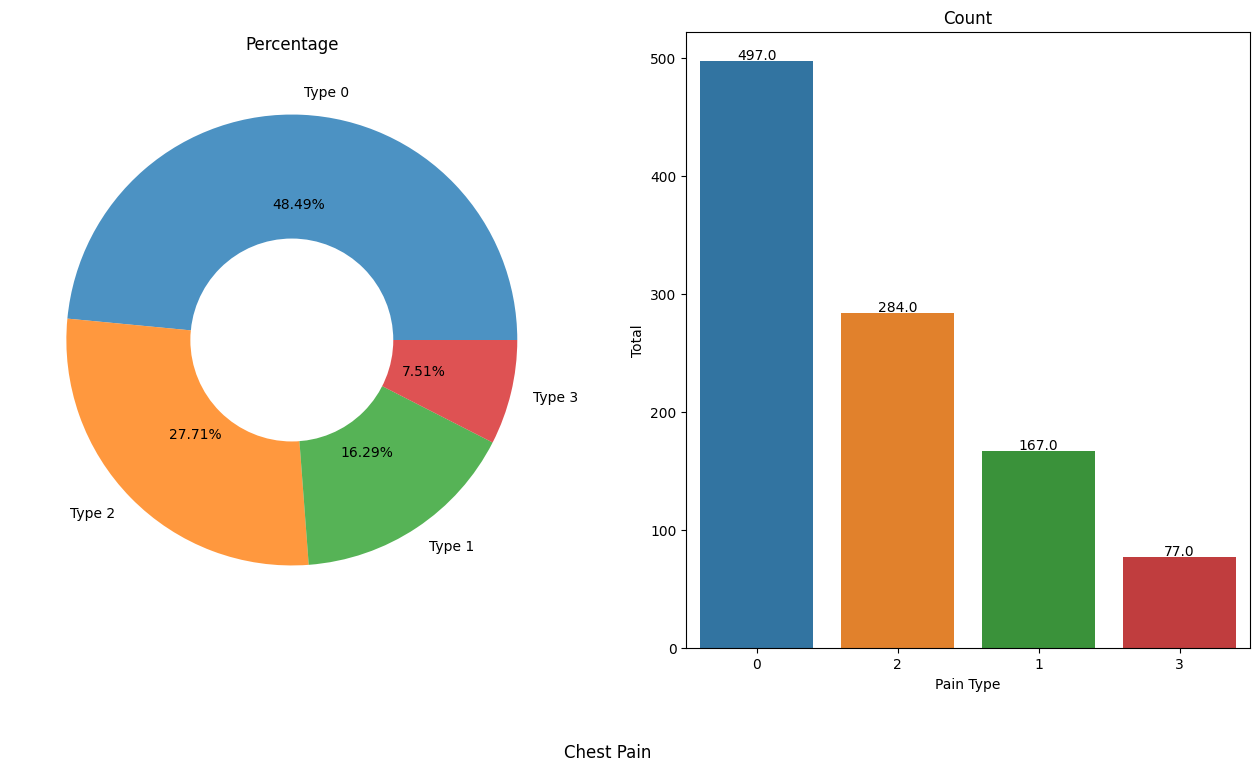

In [7]:
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=dataset['cp'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Chest Pain ',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['cp'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='cp',data=dataset,order=order)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.xlabel('Pain Type')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Chest Pain Type Total: \n')
dataset.cp.value_counts(dropna=False)
# print()


 Fasting Blood Sugar:  



0    872
1    153
Name: fbs, dtype: int64

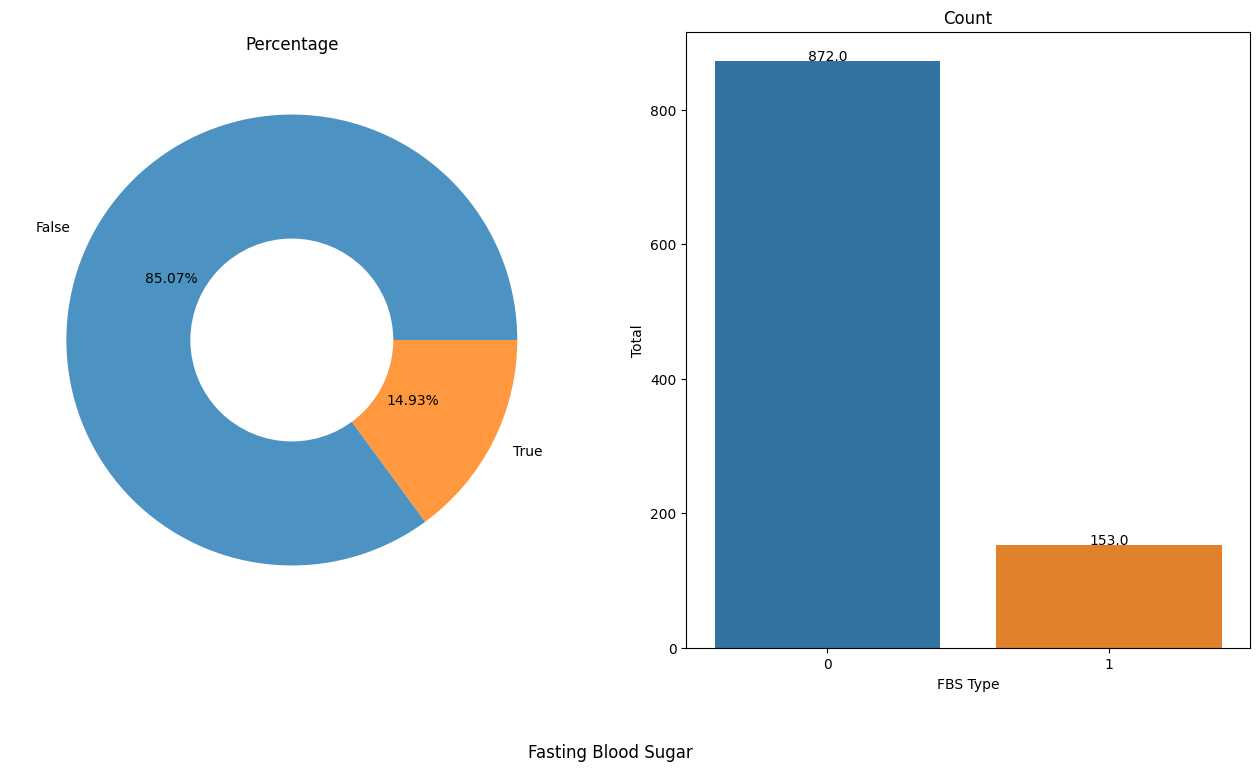

In [8]:
labels=['False', 'True']
order=dataset['fbs'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Fasting Blood Sugar',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['fbs'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='fbs',data=dataset,order=order)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.xlabel('FBS Type')
plt.ylabel('Total')
countplt


# Count Categorical Labels without dropping Null Values
print('\n Fasting Blood Sugar:  \n')
dataset.fbs.value_counts(dropna=False)
# p


 Number of Resting  Electrocardiographic values: 



1    513
0    497
2     15
Name: restecg, dtype: int64

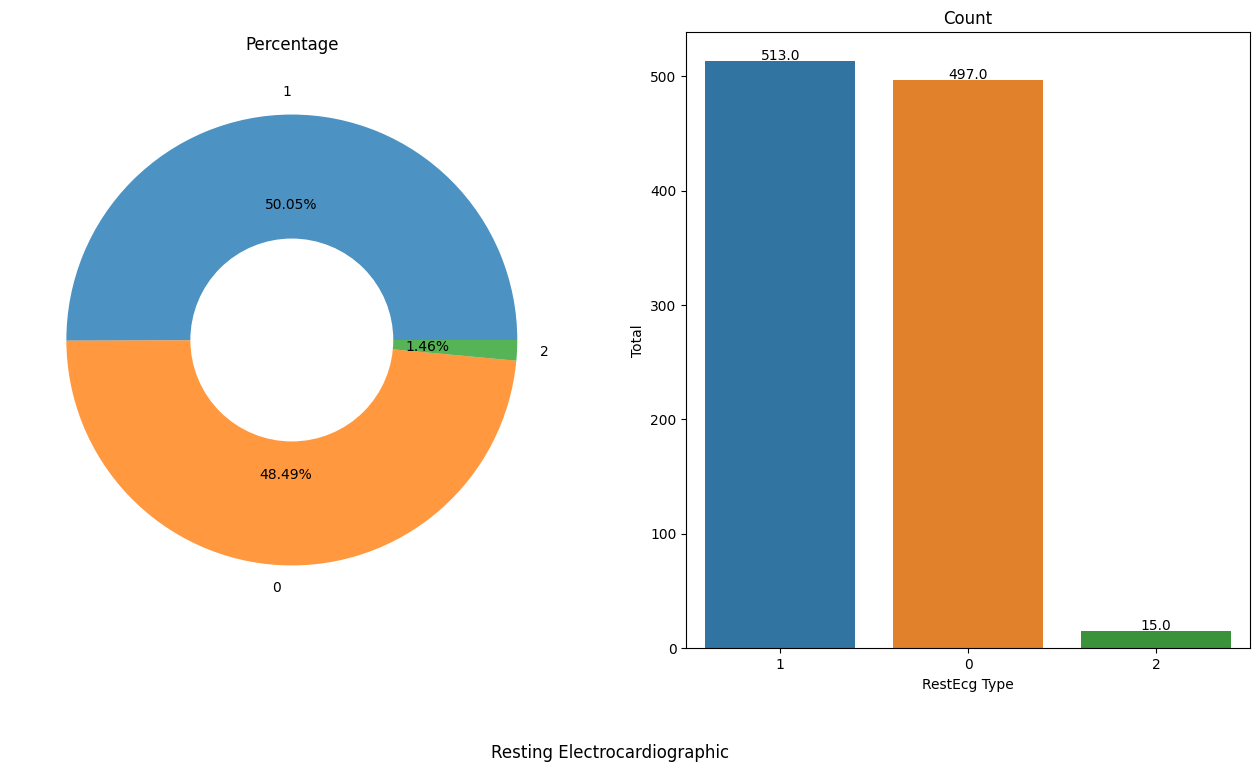

In [9]:
labels=['1', '0', '2']
order=dataset['restecg'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Resting Electrocardiographic',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['restecg'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='restecg',data=dataset,order=order)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.xlabel('RestEcg Type')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Number of Resting  Electrocardiographic values: \n')
dataset.restecg.value_counts(dropna=False)
# p



 Exercise Induced Angina Total 



0    680
1    345
Name: exang, dtype: int64

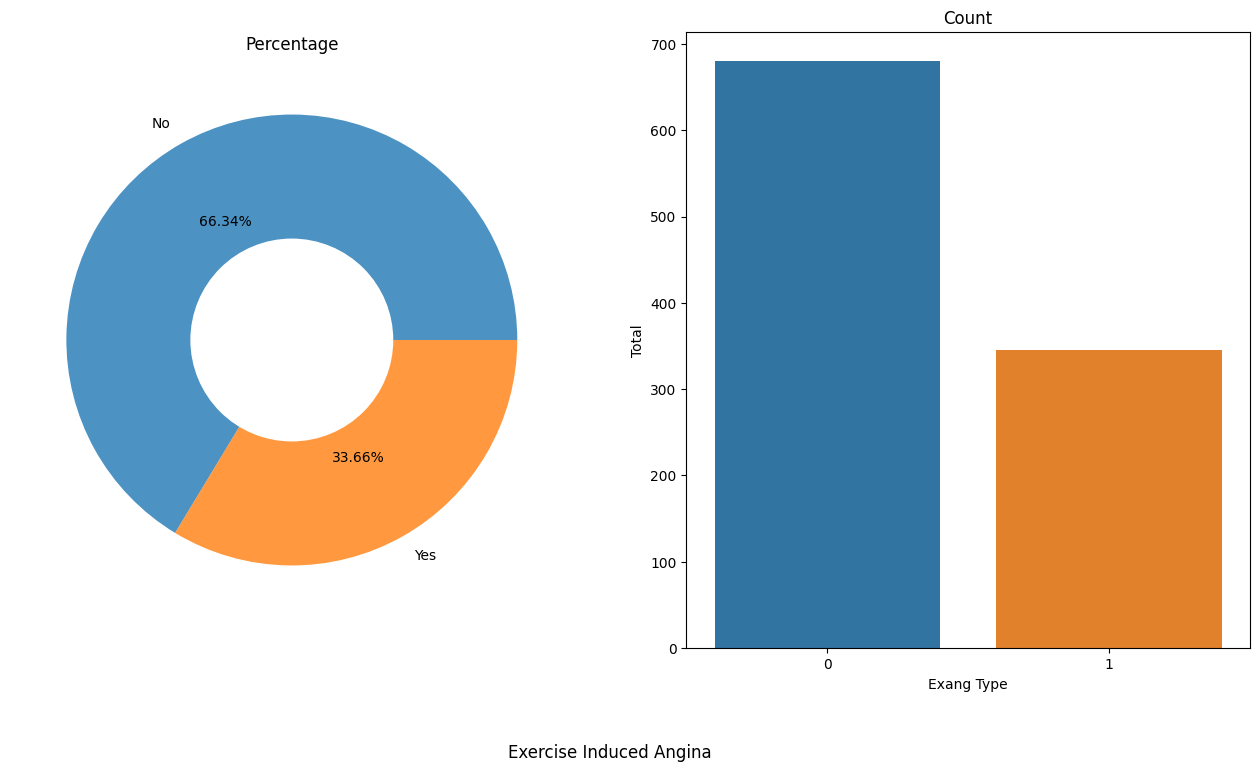

In [10]:
labels=['No', 'Yes']
order=dataset['exang'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Exercise Induced Angina',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['exang'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='exang',data=dataset,order=order)
plt.xlabel('Exang Type')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Exercise Induced Angina Total \n')
dataset.exang.value_counts(dropna=False)
# print()


 Slope values 



1    482
2    469
0     74
Name: slope, dtype: int64

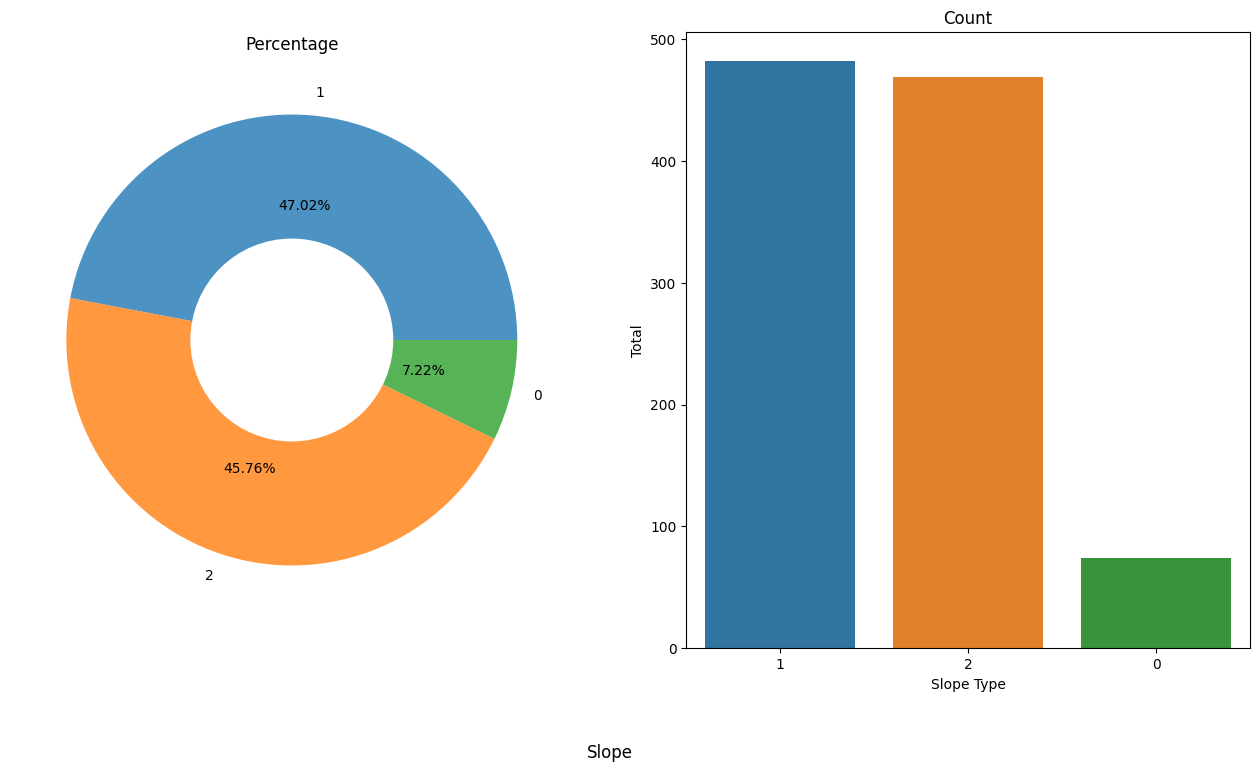

In [11]:
labels=['1','2','0']
order=dataset['slope'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Slope',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['slope'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='slope',data=dataset,order=order)
plt.xlabel('Slope Type')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Slope values \n')
dataset.slope.value_counts(dropna=False)
# print()


 Number of Major Vessels:  



0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

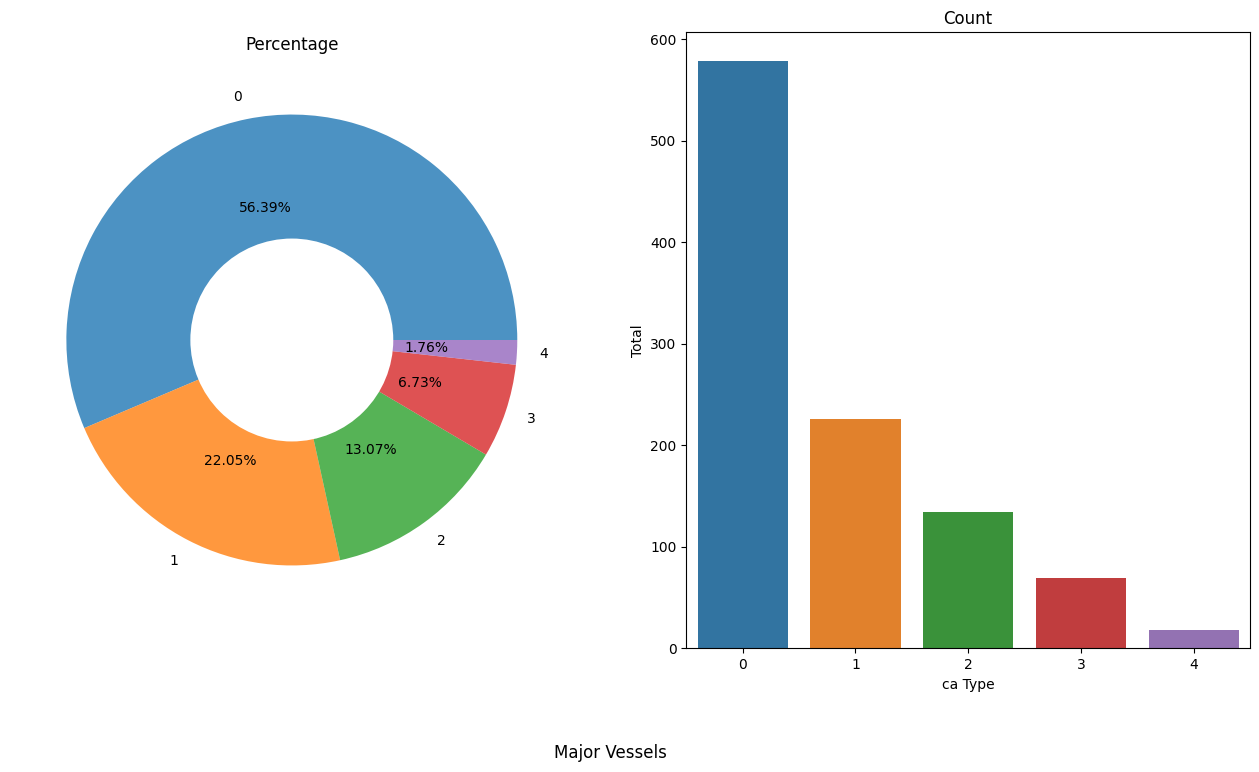

In [12]:
labels=['0', '1', '2', '3', '4']
order=dataset['ca'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Major Vessels',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['ca'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='ca',data=dataset,order=order)
plt.xlabel('ca Type')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Number of Major Vessels:  \n')
dataset.ca.value_counts(dropna=False)
# print()


 Number of Major Vessels Total  



2    544
3    410
1     64
0      7
Name: thal, dtype: int64

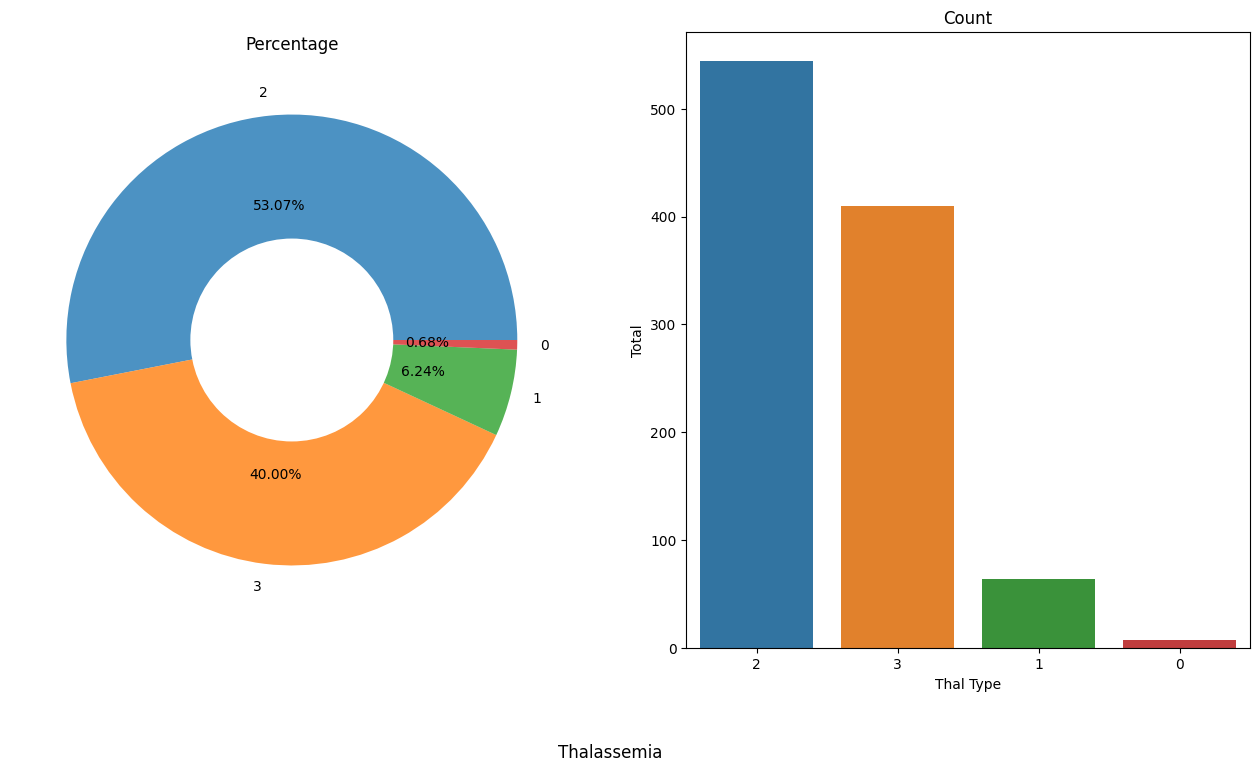

In [13]:
labels=['2','3','1','0']
order=dataset['thal'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Thalassemia',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['thal'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='thal',data=dataset,order=order)
plt.xlabel('Thal Type')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Number of Major Vessels Total  \n')
dataset.thal.value_counts(dropna=False)
# print()

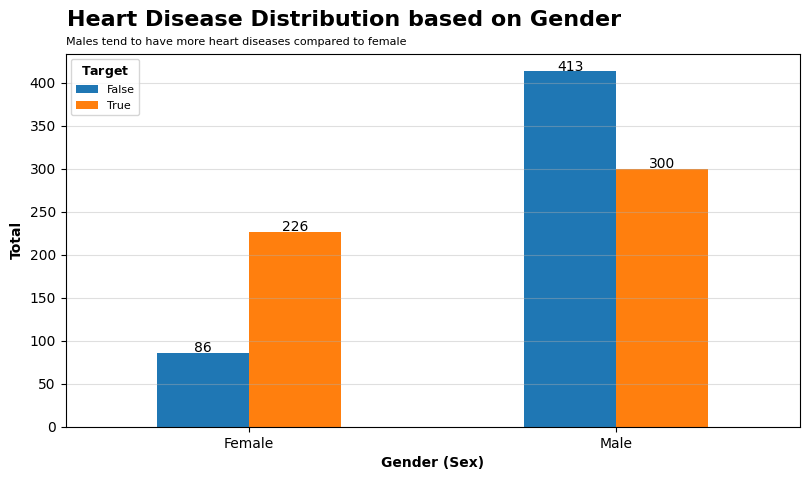

In [14]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Female', 'Male']


# --- Creating Bar Chart ---
ax = pd.crosstab(dataset.sex, dataset.target).plot(kind='bar', figsize=(8, 5))


# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.title('Males tend to have more heart diseases compared to female',fontsize='8', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

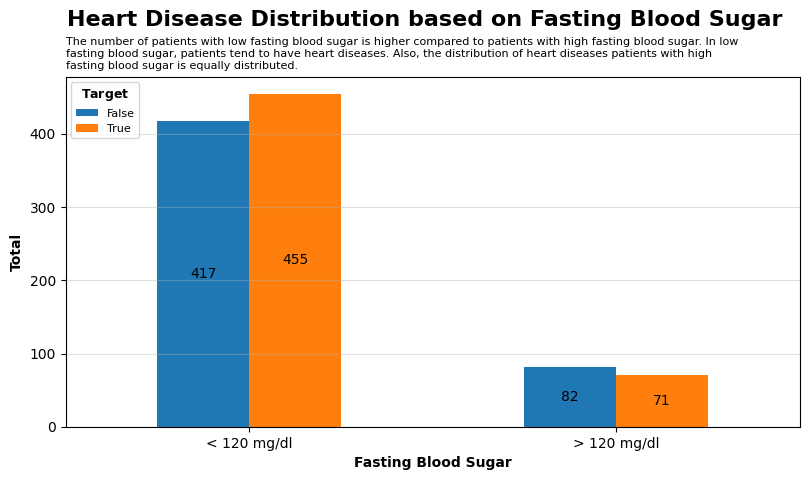

In [15]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['< 120 mg/dl', '> 120 mg/dl']

# --- Creating Bar Chart ---
ax = pd.crosstab(dataset.fbs, dataset.target).plot(kind='bar', figsize=(8, 5))

# --- Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(height), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Fasting Blood Sugar', 
             fontweight='heavy', x=0.065, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')

plt.title('The number of patients with low fasting blood sugar is higher compared to patients with high fasting blood sugar. In low\nfasting blood sugar, patients tend to have heart diseases. Also, the distribution of heart diseases patients with high\nfasting blood sugar is equally distributed.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])

plt.xlabel('Fasting Blood Sugar', fontfamily='sans-serif', fontweight='bold')

plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True)

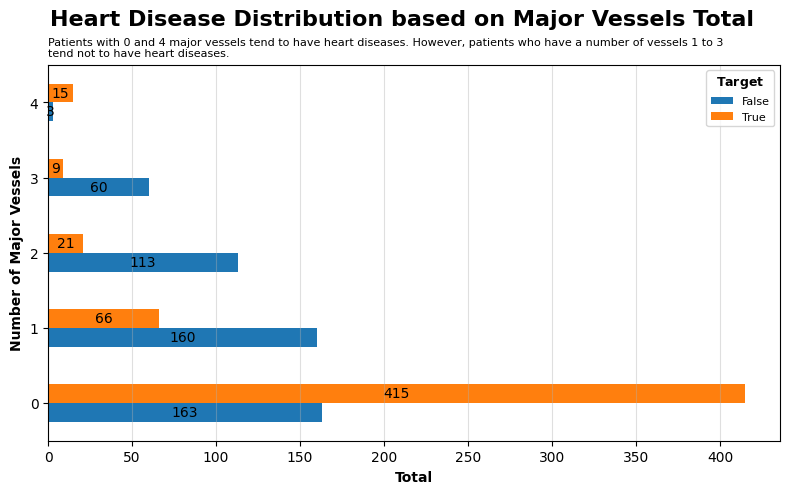

In [16]:
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(dataset.ca, dataset.target).plot(kind='barh', figsize=(8, 5))

# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold')
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right')

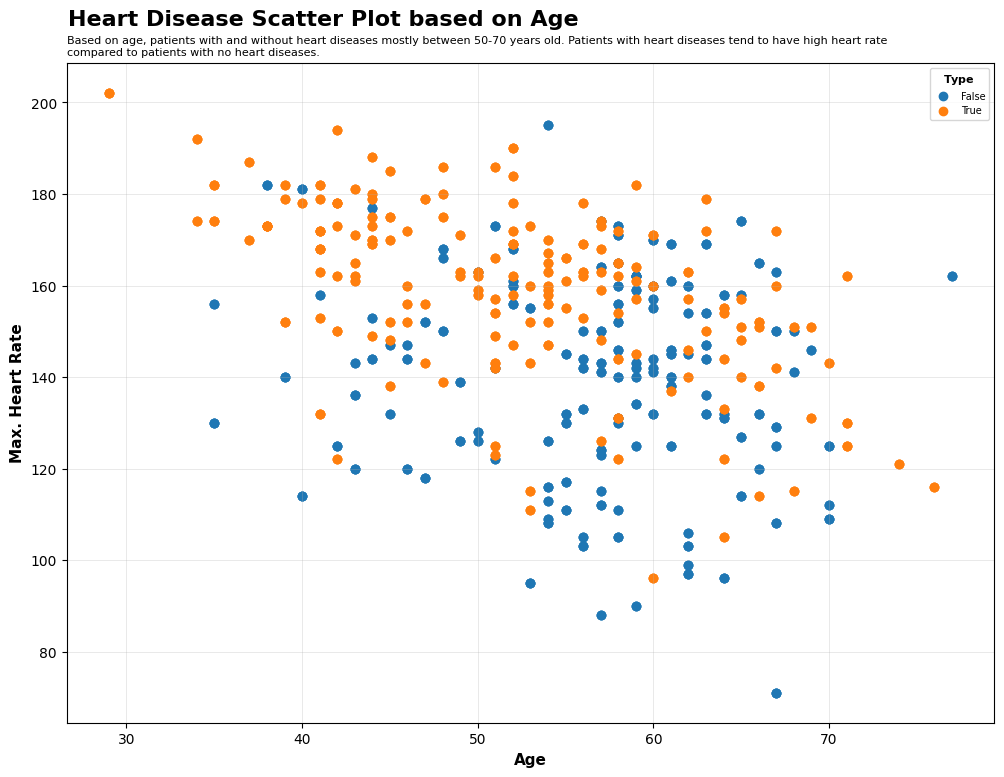

In [17]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.title('Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=dataset.age[dataset.target==0], y=dataset.thalach[(dataset.target==0)])
plt.scatter(x=dataset.age[dataset.target==1], y=dataset.thalach[(dataset.target==1)])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)

plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif')

plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif')

plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show()

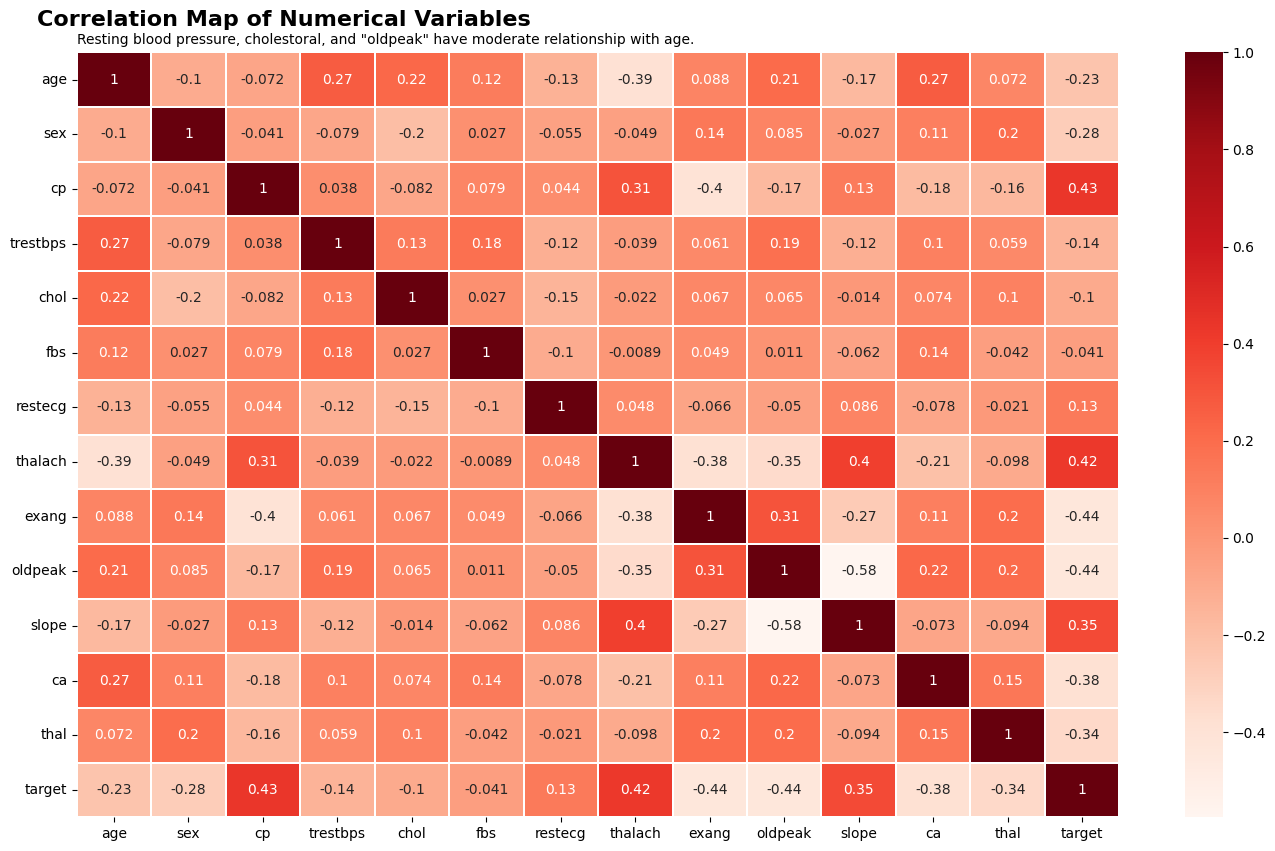

In [18]:
plt.figure(figsize=(14, 9))

sns.heatmap(dataset.corr(), annot=True, cmap='Reds', linewidths=0.1)

plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])


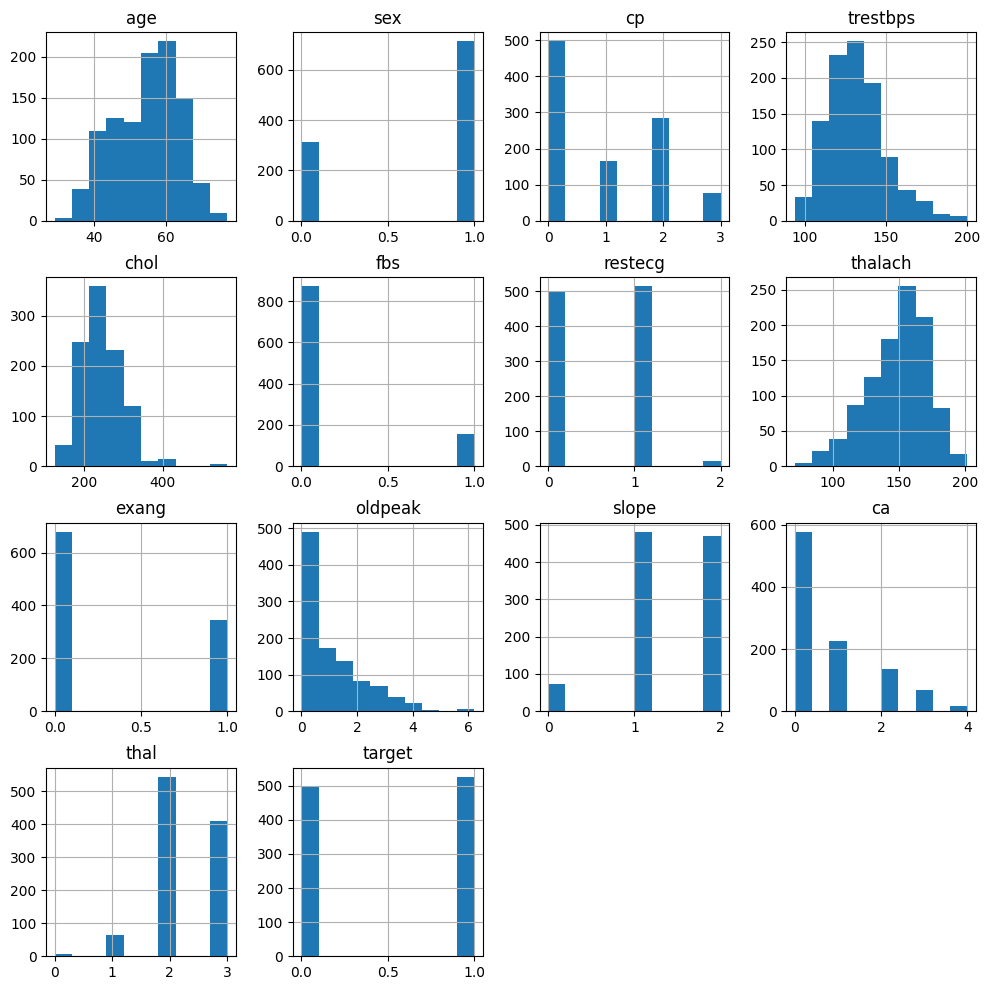

In [19]:
dataset.hist(figsize = (12, 12))
plt.show()

In [20]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Preprocessing Stage

## Taking care of missing values

In [21]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [22]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
dataset.shape

(1025, 14)

In [24]:
cate_val = []
cont_val = []
for column in dataset.columns:
    if dataset[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [25]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [26]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## Encoding Categorical Data

In [27]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [28]:
dataset['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [29]:
cate_val.remove('sex')
cate_val.remove('target')
dataset = pd.get_dummies(dataset,columns = cate_val,drop_first=True)

In [30]:
dataset

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,164,0.0,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0
1021,60,1,125,258,141,2.8,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1022,47,1,110,275,118,1.0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
1023,50,0,110,254,159,0.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# Splitting Dataset

In [31]:
X = dataset.drop('target',axis=1)
y = dataset['target']

In [32]:
X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,164,0.0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1021,60,1,125,258,141,2.8,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1022,47,1,110,275,118,1.0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
1023,50,0,110,254,159,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [33]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [34]:
X.shape, y.shape

((1025, 22), (1025,))

In [35]:
X_train,X_test,y_train,y_test=train_test_split( X,y,test_size=.2,random_state=0)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((820, 22), (205, 22), (820,), (205,))

# Feature Scaling 

In [36]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train[cont_val] = st.fit_transform(X_train[cont_val])
X_test[cont_val] = st.transform(X_test[cont_val])

In [37]:
X_train.shape , X_test.shape

((820, 22), (205, 22))

# Model Metrics

In [38]:
def model_metrics(p):
    print("Model Metrics for Testing")
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,p)
    print("Confusion Matrix")
    print(cm)
    from sklearn.metrics import classification_report
    print(classification_report(y_test,p))

In [39]:
def model_metrics_training(t):
    print("Model Metrics for Training")
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_train, t)
    print("Confusion Matrix")
    print(cm)
    from sklearn.metrics import classification_report
    print(classification_report(y_train,t))

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred_lr_nb = lr.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

score_lr = round(accuracy_score(y_pred_lr_nb,y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 90.24 %


In [42]:
model_metrics(y_pred_lr_nb)

Model Metrics for Testing
Confusion Matrix
[[ 84  14]
 [  6 101]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        98
           1       0.88      0.94      0.91       107

    accuracy                           0.90       205
   macro avg       0.91      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



In [43]:
lr_tr1 = lr.score(X_train, y_train) * 100
print("Logistic Regression Training Accuracy : {:.2f}%".format(lr_tr1))
lr_te1 = lr.score(X_test, y_test) * 100
print("Logistic Regression Testing Accuracy : {:.2f}%".format(lr_te1))

Logistic Regression Training Accuracy : 86.83%
Logistic Regression Testing Accuracy : 90.24%


### Metrics for Training (LR)

In [44]:
# Use the trained model to make predictions on the training set
y_train_pred_lr = lr.predict(X_train)
model_metrics_training(y_train_pred_lr)

Model Metrics for Training
Confusion Matrix
[[337  64]
 [ 44 375]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       401
           1       0.85      0.89      0.87       419

    accuracy                           0.87       820
   macro avg       0.87      0.87      0.87       820
weighted avg       0.87      0.87      0.87       820



# Naive bayes

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense

In [46]:
nb = GaussianNB()

nb.fit(X_train,y_train)

y_pred_nb_nb = nb.predict(X_test)

In [47]:
score_nb = round(accuracy_score(y_pred_nb_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 86.83 %


In [48]:
model_metrics(y_pred_nb_nb)

Model Metrics for Testing
Confusion Matrix
[[79 19]
 [ 8 99]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.85        98
           1       0.84      0.93      0.88       107

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [49]:
nb_tr1=nb.score(X_train, y_train) * 100
print("Naive Bayes Training Accuracy : {:.2f}%".format(nb_tr1))
nb_te1=nb.score(X_test, y_test) * 100
print("Naive Bayes Testing Accuracy : {:.2f}%".format(nb_te1))

Naive Bayes Training Accuracy : 83.78%
Naive Bayes Testing Accuracy : 86.83%


### Training  Model metrics for Naive Bayes

In [50]:
# Use the trained model to make predictions on the training set
y_train_pred_nb = nb.predict(X_train)
model_metrics_training(y_train_pred_nb)

Model Metrics for Training
Confusion Matrix
[[328  73]
 [ 60 359]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       401
           1       0.83      0.86      0.84       419

    accuracy                           0.84       820
   macro avg       0.84      0.84      0.84       820
weighted avg       0.84      0.84      0.84       820



# SVM

In [51]:
from sklearn import svm

svm = svm.SVC()

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

In [52]:
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 92.2 %


In [53]:
model_metrics(y_pred_svm)

Model Metrics for Testing
Confusion Matrix
[[ 87  11]
 [  5 102]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        98
           1       0.90      0.95      0.93       107

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



In [54]:
svm_tr1=svm.score(X_train, y_train) * 100
print("SVM Training Accuracy : {:.2f}%".format(svm_tr1))
svm_te1=svm.score(X_test, y_test) * 100
print("Support Vector Machine Testing Accuracy: {:.2f}%".format(svm_te1))

SVM Training Accuracy : 94.88%
Support Vector Machine Testing Accuracy: 92.20%


### Training Model metrics for  (SVM)

In [55]:
# Use the trained model to make predictions on the training set
y_train_pred_svm = svm.predict(X_train)
model_metrics_training(y_train_pred_svm)

Model Metrics for Training
Confusion Matrix
[[375  26]
 [ 16 403]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       401
           1       0.94      0.96      0.95       419

    accuracy                           0.95       820
   macro avg       0.95      0.95      0.95       820
weighted avg       0.95      0.95      0.95       820



# KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [57]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 86.34 %


In [58]:
knn_tr1=knn.score(X_train, y_train) * 100
print("KNN Accuracy Training Accuracy : {:.2f}%".format(knn_tr1))
knn_te1=knn.score(X_test, y_test) * 100
print("KNN Model Testing Accuracy: {:.2f}%".format(knn_te1))

KNN Accuracy Training Accuracy : 90.61%
KNN Model Testing Accuracy: 86.34%


In [59]:
model_metrics(y_pred_knn)

Model Metrics for Testing
Confusion Matrix
[[79 19]
 [ 9 98]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        98
           1       0.84      0.92      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



### Training Model metrics for KNN

In [60]:
# Use the trained model to make predictions on the training set
y_train_pred_knn = knn.predict(X_train)
model_metrics_training(y_train_pred_knn)

Model Metrics for Training
Confusion Matrix
[[364  37]
 [ 40 379]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       401
           1       0.91      0.90      0.91       419

    accuracy                           0.91       820
   macro avg       0.91      0.91      0.91       820
weighted avg       0.91      0.91      0.91       820



# ANN

In [61]:
# 2 - 98.54
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state=2)
nn_model.fit(X_train, y_train)
y_pred5 = nn_model.predict(X_test)
print(nn_model.score(X_train, y_train))


0.9878048780487805


D:\HeartDiseaseProject\hvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [62]:
model_metrics(y_pred5)

Model Metrics for Testing
Confusion Matrix
[[ 96   2]
 [  1 106]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        98
           1       0.98      0.99      0.99       107

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [63]:
nn_tr1 = nn_model.score(X_train, y_train) * 100
print("Neural Network Training Accuracy : {:.2f}%".format(nn_tr1))
nn_te1 = nn_model.score(X_test, y_test) * 100
print("Neural Network Testing Accuracy: {:.2f}%".format(nn_te1))

Neural Network Training Accuracy : 98.78%
Neural Network Testing Accuracy: 98.54%


### Training Model Metrics for the ANN

In [64]:
# Use the trained model to make predictions on the training set
y_train_pred_ann = nn_model.predict(X_train)
model_metrics_training(y_train_pred_ann)

Model Metrics for Training
Confusion Matrix
[[396   5]
 [  5 414]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       401
           1       0.99      0.99      0.99       419

    accuracy                           0.99       820
   macro avg       0.99      0.99      0.99       820
weighted avg       0.99      0.99      0.99       820



# CNN - without feature selection

In [65]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [66]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
315,-1.405034,1,0.947890,-0.058677,1.258177,-0.212795,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
204,1.262700,0,0.832696,0.595166,0.128065,-0.928291,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
363,-0.182322,1,-0.088854,-0.020216,1.040848,-0.928291,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5,0.373456,0,-1.816760,0.018246,-1.175910,-0.033921,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1017,-0.182322,1,-0.492032,0.672089,-2.349489,0.860450,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-0.626945,1,-0.780016,-1.885593,-1.002047,-0.212795,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
192,1.373856,0,-0.952807,6.095144,0.475792,0.502702,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
629,1.151545,1,0.371921,0.672089,1.084314,0.323827,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
559,1.373856,1,-0.664822,-0.193292,-3.392669,-0.033921,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [67]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
807,-1.182722,1,-0.088854,-0.270215,1.301643,-0.570543,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
27,0.373456,0,0.256728,1.383625,0.128065,-0.928291,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
77,0.929234,1,0.487115,-1.154826,-0.219662,2.649190,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
406,0.373456,1,0.487115,-0.693290,0.693121,-0.928291,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
886,0.706922,1,-0.664822,0.249014,-0.393525,2.291442,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,-1.293878,0,-0.549629,-0.654829,0.693121,-0.749417,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
320,-0.182322,0,-0.088854,0.325937,-0.263127,-0.570543,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
362,-1.293878,0,-0.549629,-0.654829,0.693121,-0.749417,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
452,1.262700,0,2.675796,-0.366368,0.693121,-0.033921,0,0,0,1,...,1,1,0,0,1,0,0,0,0,1


In [68]:
# Reshape the data for input into a CNN model
X_train = X_train.values.reshape((-1, X_train.shape[1], 1))
X_test = X_test.values.reshape((-1, X_test.shape[1], 1))

In [69]:
X_test

array([[[-1.18272244],
        [ 1.        ],
        [-0.08885372],
        ...,
        [ 0.        ],
        [ 1.        ],
        [ 0.        ]],

       [[ 0.37345562],
        [ 0.        ],
        [ 0.25672755],
        ...,
        [ 0.        ],
        [ 1.        ],
        [ 0.        ]],

       [[ 0.9292335 ],
        [ 1.        ],
        [ 0.48711505],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 1.        ]],

       ...,

       [[-1.29387801],
        [ 0.        ],
        [-0.54962874],
        ...,
        [ 0.        ],
        [ 1.        ],
        [ 0.        ]],

       [[ 1.26270023],
        [ 0.        ],
        [ 2.6757964 ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 1.        ]],

       [[ 1.81847811],
        [ 0.        ],
        [-1.12559751],
        ...,
        [ 0.        ],
        [ 1.        ],
        [ 0.        ]]])

In [70]:
# Create a CNN model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                1

In [72]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
# Train the model on the training set
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
26/26 [==============================] - 4s 26ms/step - loss: 0.6303 - accuracy: 0.6793 - val_loss: 0.5118 - val_accuracy: 0.8195
Epoch 2/20
26/26 [==============================] - 0s 7ms/step - loss: 0.4645 - accuracy: 0.8207 - val_loss: 0.3427 - val_accuracy: 0.8585
Epoch 3/20
26/26 [==============================] - 0s 6ms/step - loss: 0.3729 - accuracy: 0.8232 - val_loss: 0.2830 - val_accuracy: 0.8829
Epoch 4/20
26/26 [==============================] - 0s 7ms/step - loss: 0.3577 - accuracy: 0.8439 - val_loss: 0.2674 - val_accuracy: 0.8927
Epoch 5/20
26/26 [==============================] - 0s 6ms/step - loss: 0.3285 - accuracy: 0.8512 - val_loss: 0.2512 - val_accuracy: 0.8976
Epoch 6/20
26/26 [==============================] - 0s 8ms/step - loss: 0.3171 - accuracy: 0.8634 - val_loss: 0.2378 - val_accuracy: 0.9122
Epoch 7/20
26/26 [==============================] - 0s 6ms/step - loss: 0.3030 - accuracy: 0.8744 - val_loss: 0.2313 - val_accuracy: 0.9122
Epoch 8/20
26/26 [=

In [74]:
# Use the trained model to make predictions on the training and testing sets
# y_train_pred = model.predict_classes(X_train)
# predict_x=model.predict(X_test) 
# classes_x=np.argmax(predict_x,axis=1)
# y_test_pred = model.predict_classes(X_test)


# y_train_pred =  np.argmax(model.predict(X_train), axis=-1)
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")


# y_test_pred = np.argmax(model.predict(X_test), axis=-1)
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

7/7 [==============================] - 0s 4ms/step


In [75]:
# Calculate and print the confusion matrices for the training and testing sets
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

In [76]:
print("Confusion matrix for the training set:")
print(train_cm)

Confusion matrix for the training set:
[[378  23]
 [  6 413]]


In [77]:
print("\nConfusion matrix for the testing set:")
print(test_cm)


Confusion matrix for the testing set:
[[ 88  10]
 [  0 107]]


In [78]:
# Calculate and print the training and testing accuracy
train_loss, cnn_train_acc1 = model.evaluate(X_train, y_train)
print("Training Accuracy:", cnn_train_acc1)

test_loss, cnn_test_acc1 = model.evaluate(X_test, y_test)
print("Testing Accuracy:", cnn_test_acc1)

26/26 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9646
Training Accuracy: 0.964634120464325
7/7 [==============================] - 0s 4ms/step - loss: 0.1426 - accuracy: 0.9512
Testing Accuracy: 0.9512194991111755


In [79]:
from sklearn.metrics import classification_report

In [80]:
# Print the classification report for the training set
print("Classification Report for the Training Set:")
print(classification_report(y_train, y_train_pred))

Classification Report for the Training Set:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       401
           1       0.95      0.99      0.97       419

    accuracy                           0.96       820
   macro avg       0.97      0.96      0.96       820
weighted avg       0.97      0.96      0.96       820



In [81]:
# Print the classification report for the testing set
print("\nClassification Report for the Testing Set:")
print(classification_report(y_test, y_test_pred))


Classification Report for the Testing Set:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        98
           1       0.91      1.00      0.96       107

    accuracy                           0.95       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.95      0.95       205



# Here Come's our Main Algorithm (Keep your mind Open I'm going to give you wisdom nuggets)

## Boruta is a feature selection technique that uses a backward elimination approach.

In Boruta, all the candidate features are initially evaluated using a random forest classifier, and the importance scores of each feature are obtained. Then, a shadow feature set is created by randomly permuting the values of the original features. This shadow feature set is used to estimate the importance of the features under the null hypothesis that they are not relevant.

Boruta then iteratively removes the features that are deemed not significantly different from their corresponding shadow features until only the relevant features remain. This backward elimination process continues until the remaining set of features is statistically significant.

Therefore, Boruta does not use a forward selection approach like some other feature selection techniques such as sequential feature selection.



### Basically installed our most awaited guest Boruta

In [82]:
!pip install boruta

In [83]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

### Importing Dataset

In [84]:
dataset = pd.read_csv("heart.csv")

In [85]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Remenber I had allready checked wheater my data has null values or missing values our dataset is perfect

### -Spillting the dataset into independent X and depented feature y

In [86]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
X.shape

(1025, 13)

In [87]:
forest = RandomForestClassifier(n_estimators=50, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	2


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	2


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=50, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x141FF75FB40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x141FF75FB40, verbose=2)

### Yaa It's like magic but their are a lot of stuff going on in the background but our "Boruta" had come up with the most import features

In [88]:
most_important = dataset.columns[:-1][feat_selector.support_].tolist()
most_important

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

### Here we trying to create a new dataset by only including the most important feature and dropping the least important

In [89]:
dataset1 = dataset.drop(columns= ["restecg","fbs"])

In [90]:
dataset1

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,168,0,1.0,2,2,3,0
1,53,1,0,140,203,155,1,3.1,0,0,3,0
2,70,1,0,145,174,125,1,2.6,0,0,3,0
3,61,1,0,148,203,161,0,0.0,2,1,3,0
4,62,0,0,138,294,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,159,0,0.0,2,0,2,1


In [91]:
dataset1.shape

(1025, 12)

# Now Here comes again the Data preprocessing stage

Now here in our dataset we had several catogoraical feature we just directly cannot fed such variable to the Machine learning model,because the ML model will misinterpret it so here I'm using one of the most well known technique called One-Hot Encoding.

### Below code is basically segratting the categorical features and (numerical)Constant value features

In [92]:
cate_val = []
cont_val = []
for column in dataset1.columns:
    if dataset1[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [93]:
# categorical features
cate_val

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [94]:
# Non-categoraical(numerical) feature
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Here I'm Econding Categorical Data using .get_dummies() method

In [95]:
cate_val

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [96]:
dataset1['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [97]:
cate_val.remove('sex')
cate_val.remove('target')
dataset1 = pd.get_dummies(dataset1,columns = cate_val,drop_first=True)

In [98]:
dataset1

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,164,0.0,1,1,0,0,1,0,1,0,0,0,0,0,1,0
1021,60,1,125,258,141,2.8,0,0,0,0,1,1,0,1,0,0,0,0,0,1
1022,47,1,110,275,118,1.0,0,0,0,0,1,1,0,1,0,0,0,0,1,0
1023,50,0,110,254,159,0.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


## Spilting the dataset into independent X and depented feature y

In [99]:
X = dataset1.drop('target',axis=1)
y = dataset1['target']

## Splitting the dataset into the training and testing

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)
X_train.shape,X_test.shape

((820, 19), (205, 19))

# Feature Scaling stage

Feature scaling is used in machine learning to normalize the input features of a dataset so that they have a similar scale or range. This helps avoid bias, improve model performance, reduce computational complexity, and facilitate interpretation, leading to more accurate and efficient models.

Here, I had used the StandardScaler feature scaling techinique.
The StandardScaler is a popular feature scaling technique in machine learning that transforms the input features of a dataset to have zero mean and unit variance. This ensures that all features contribute equally to the analysis and helps avoid bias towards features with larger scales.

In [101]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train[cont_val] = st.fit_transform(X_train[cont_val])
X_test[cont_val] = st.transform(X_test[cont_val])

In [102]:
X_test.shape

(205, 19)

In [103]:
X_train.shape

(820, 19)

# Now below I had trained various classification models and find their various metrics 

# Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score

score_lr_wb = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr_wb)+" %")

The accuracy score achieved using Logistic Regression is: 90.73 %


In [106]:
model_metrics(y_pred_lr)

Model Metrics for Testing
Confusion Matrix
[[ 85  13]
 [  6 101]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        98
           1       0.89      0.94      0.91       107

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



In [107]:
lr_tr2 = lr.score(X_train, y_train) * 100
print("Logistic Regression Training Accuracy : {:.2f}%".format(lr_tr2))
lr_te2 = lr.score(X_test, y_test) * 100
print("Logistic Regression Testing Accuracy : {:.2f}%".format(lr_te2))

Logistic Regression Training Accuracy : 87.93%
Logistic Regression Testing Accuracy : 90.73%


In [108]:
# Use the trained model to make predictions on the training set
y_train_pred_lr = lr.predict(X_train)
model_metrics_training(y_train_pred_lr)

Model Metrics for Training
Confusion Matrix
[[342  59]
 [ 40 379]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       401
           1       0.87      0.90      0.88       419

    accuracy                           0.88       820
   macro avg       0.88      0.88      0.88       820
weighted avg       0.88      0.88      0.88       820



# Naive Bayes

In [109]:
nb = GaussianNB()

nb.fit(X_train,y_train)

y_pred_nb = nb.predict(X_test)

In [110]:
score_nb_wb = round(accuracy_score(y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb_wb)+" %")

The accuracy score achieved using Naive Bayes is: 87.8 %


In [111]:
model_metrics(y_pred_nb)

Model Metrics for Testing
Confusion Matrix
[[84 14]
 [11 96]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [112]:
nb_tr2 = nb.score(X_train, y_train) * 100
print("Naive Bayes Accuracy Training Accuracy : {:.2f}%".format(nb_tr2))
nb_te2 = nb.score(X_test, y_test) * 100
print("Naive Bayes Testing Accuracy: {:.2f}%".format(nb_te2))

Naive Bayes Accuracy Training Accuracy : 83.54%
Naive Bayes Testing Accuracy: 87.80%


In [113]:
# Use the trained model to make predictions on the training set
y_train_pred_nb = nb.predict(X_train)
model_metrics_training(y_train_pred_nb)

Model Metrics for Training
Confusion Matrix
[[336  65]
 [ 70 349]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       401
           1       0.84      0.83      0.84       419

    accuracy                           0.84       820
   macro avg       0.84      0.84      0.84       820
weighted avg       0.84      0.84      0.84       820



# SVM

In [114]:
from sklearn import svm

svm = svm.SVC()

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

In [115]:
score_svm_wb = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm_wb)+" %")

The accuracy score achieved using Linear SVM is: 93.17 %


In [116]:
model_metrics(y_pred_svm)

Model Metrics for Testing
Confusion Matrix
[[ 87  11]
 [  3 104]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        98
           1       0.90      0.97      0.94       107

    accuracy                           0.93       205
   macro avg       0.94      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



In [117]:
svm_tr2 = svm.score(X_train, y_train) * 100
print("SVM Training Accuracy : {:.2f}%".format(svm_tr2))
svm_te2 = svm.score(X_test, y_test) * 100
print("Support Vector Machine Testing Accuracy: {:.2f}%".format(svm_te2))

SVM Training Accuracy : 94.63%
Support Vector Machine Testing Accuracy: 93.17%


In [118]:
# Use the trained model to make predictions on the training set
y_train_pred_svm = svm.predict(X_train)
model_metrics_training(y_train_pred_svm)

Model Metrics for Training
Confusion Matrix
[[375  26]
 [ 18 401]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       401
           1       0.94      0.96      0.95       419

    accuracy                           0.95       820
   macro avg       0.95      0.95      0.95       820
weighted avg       0.95      0.95      0.95       820



# KNN

In [119]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [120]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 86.34 %


In [121]:
model_metrics(y_pred_knn)

Model Metrics for Testing
Confusion Matrix
[[78 20]
 [ 8 99]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [122]:
knn_tr2 = knn.score(X_train, y_train) * 100
print("KNN Accuracy Training Accuracy : {:.2f}%".format(knn_tr2))
knn_te2 = knn.score(X_test, y_test) * 100
print("KNN Model Testing Accuracy: {:.2f}%".format(knn_te2))

KNN Accuracy Training Accuracy : 89.51%
KNN Model Testing Accuracy: 86.34%


In [123]:
# Use the trained model to make predictions on the training set
y_train_pred_knn = knn.predict(X_train)
model_metrics_training(y_train_pred_knn)

Model Metrics for Training
Confusion Matrix
[[362  39]
 [ 47 372]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       401
           1       0.91      0.89      0.90       419

    accuracy                           0.90       820
   macro avg       0.90      0.90      0.90       820
weighted avg       0.90      0.90      0.90       820



# ANN

In [124]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state=2)
nn_model.fit(X_train, y_train)
y_pred5 = nn_model.predict(X_test)
# print(nn_model.score(X_train, y_train))

D:\HeartDiseaseProject\hvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [125]:
model_metrics(y_pred5)

Model Metrics for Testing
Confusion Matrix
[[ 96   2]
 [  1 106]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        98
           1       0.98      0.99      0.99       107

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [126]:
nn_tr2 = nn_model.score(X_train, y_train) * 100
print("Neural Network Training Accuracy : {:.2f}%".format(nn_tr2))
nn_te2 = nn_model.score(X_test, y_test) * 100
print("Neural Network Testing Accuracy: {:.2f}%".format(nn_te2))

Neural Network Training Accuracy : 98.41%
Neural Network Testing Accuracy: 98.54%


In [127]:
import pickle
pickle.dump(nn_model, open('model_wcc.pkl', 'wb'))

In [390]:
# Use the trained model to make predictions on the training set
y_train_pred_ann = nn_model.predict(X_train)
model_metrics_training(y_train_pred_ann)

Model Metrics for Training
Confusion Matrix
[[396   5]
 [  8 411]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       401
           1       0.99      0.98      0.98       419

    accuracy                           0.98       820
   macro avg       0.98      0.98      0.98       820
weighted avg       0.98      0.98      0.98       820



# Here comes the CNN(Which is our main area of focus for our project)

## CNN Model

#### Importing the neccesary libaraies

In [391]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

## Now point to be noted we Had allready splitted our dataset into testing and training we are that directly here

In [392]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
315,-1.405034,1,0.947890,-0.058677,1.258177,-0.212795,0,0,1,0,0,1,0,1,0,0,0,1,0
204,1.262700,0,0.832696,0.595166,0.128065,-0.928291,0,1,0,0,1,0,1,0,0,0,0,1,0
363,-0.182322,1,-0.088854,-0.020216,1.040848,-0.928291,0,1,0,0,0,1,0,0,1,0,0,1,0
5,0.373456,0,-1.816760,0.018246,-1.175910,-0.033921,0,0,0,0,1,0,0,0,0,0,0,1,0
1017,-0.182322,1,-0.492032,0.672089,-2.349489,0.860450,0,0,0,1,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-0.626945,1,-0.780016,-1.885593,-1.002047,-0.212795,0,1,0,0,0,1,0,0,1,0,0,1,0
192,1.373856,0,-0.952807,6.095144,0.475792,0.502702,0,1,0,0,1,0,0,0,0,0,0,0,1
629,1.151545,1,0.371921,0.672089,1.084314,0.323827,0,0,1,0,1,0,1,0,0,0,0,1,0
559,1.373856,1,-0.664822,-0.193292,-3.392669,-0.033921,0,0,0,0,1,0,0,0,0,0,0,1,0


In [393]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
807,-1.182722,1,-0.088854,-0.270215,1.301643,-0.570543,0,1,0,1,0,1,0,0,0,0,0,1,0
27,0.373456,0,0.256728,1.383625,0.128065,-0.928291,1,0,0,0,0,1,0,1,0,0,0,1,0
77,0.929234,1,0.487115,-1.154826,-0.219662,2.649190,0,0,0,1,0,1,0,1,0,0,0,0,1
406,0.373456,1,0.487115,-0.693290,0.693121,-0.928291,0,1,0,0,0,1,0,0,0,0,0,1,0
886,0.706922,1,-0.664822,0.249014,-0.393525,2.291442,0,0,0,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,-1.293878,0,-0.549629,-0.654829,0.693121,-0.749417,0,1,0,0,1,0,0,0,0,0,0,1,0
320,-0.182322,0,-0.088854,0.325937,-0.263127,-0.570543,0,0,0,0,1,0,0,0,0,0,0,1,0
362,-1.293878,0,-0.549629,-0.654829,0.693121,-0.749417,0,1,0,0,1,0,0,0,0,0,0,1,0
452,1.262700,0,2.675796,-0.366368,0.693121,-0.033921,0,0,0,1,1,0,0,1,0,0,0,0,1


## Now the CNN works quite differently their it takes input so that's why we need to reshape it below is the explanation

This code is used in a Convolutional Neural Network (CNN) to reshape the input data into the appropriate format required for 1D convolutional layers to operate on it. 

In a CNN, the input data is expected to be in the form of a tensor with dimensions `(batch_size, sequence_length, num_channels)`. The `X_train.values.reshape((-1, X_train.shape[1], 1))` code reshapes the input data into a 3D tensor with dimensions `(num_samples, num_features, num_channels)`, where `num_features` corresponds to the length of the input sequence and `num_channels` corresponds to the number of input features (in this case, it is set to 1).

By reshaping the input data in this way, we can feed it into a 1D convolutional layer in a CNN, which can then learn to extract relevant features from the input sequence. The convolutional layer slides a small window (called a filter or kernel) over the input sequence, performing a dot product between the filter weights and the input at each step to produce a new sequence of output values. This operation is repeated with multiple filters to extract different features from the input sequence.

Overall, reshaping the input data in this way is an important step in preparing data for use in a 1D CNN, which is a powerful tool for sequence-based data analysis.

In [394]:
# Reshape the data for input into a CNN model
X_train = X_train.values.reshape((-1, X_train.shape[1], 1))
X_test = X_test.values.reshape((-1, X_test.shape[1], 1))

In [395]:
# Create a CNN model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [396]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [397]:
# Train the model on the training set
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
26/26 [==============================] - 2s 19ms/step - loss: 0.6249 - accuracy: 0.6768 - val_loss: 0.5086 - val_accuracy: 0.8341
Epoch 2/20
26/26 [==============================] - 0s 6ms/step - loss: 0.4639 - accuracy: 0.8244 - val_loss: 0.3391 - val_accuracy: 0.8585
Epoch 3/20
26/26 [==============================] - 0s 6ms/step - loss: 0.3817 - accuracy: 0.8134 - val_loss: 0.2929 - val_accuracy: 0.8439
Epoch 4/20
26/26 [==============================] - 0s 6ms/step - loss: 0.3506 - accuracy: 0.8390 - val_loss: 0.2756 - val_accuracy: 0.8585
Epoch 5/20
26/26 [==============================] - 0s 6ms/step - loss: 0.3335 - accuracy: 0.8451 - val_loss: 0.2716 - val_accuracy: 0.8780
Epoch 6/20
26/26 [==============================] - 0s 6ms/step - loss: 0.3138 - accuracy: 0.8622 - val_loss: 0.2511 - val_accuracy: 0.8780
Epoch 7/20
26/26 [==============================] - 0s 7ms/step - loss: 0.2989 - accuracy: 0.8598 - val_loss: 0.2369 - val_accuracy: 0.8732
Epoch 8/20
26/26 [=

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                1

In [398]:
# Use the trained model to make predictions on the training and testing sets
# y_train_pred = model.predict_classes(X_train)
# y_test_pred = model.predict_classes(X_test)
# y_train_pred =  np.argmax(model.predict(X_train), axis=-1)
# y_test_pred = np.argmax(model.predict(X_test), axis=-1)

# y_train_pred =  np.argmax(model.predict(X_train), axis=-1)
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")


# y_test_pred = np.argmax(model.predict(X_test), axis=-1)
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

7/7 [==============================] - 0s 2ms/step


In [399]:
# Calculate and print the confusion matrices for the training and testing sets
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

In [400]:
print("Confusion matrix for the training set:")
print(train_cm)

Confusion matrix for the training set:
[[371  30]
 [  8 411]]


In [401]:
print("\nConfusion matrix for the testing set:")
print(test_cm)


Confusion matrix for the testing set:
[[ 89   9]
 [  1 106]]


In [402]:
# Calculate and print the training and testing accuracy
train_loss, cnn_train_acc2 = model.evaluate(X_train, y_train)
print("Training Accuracy:", cnn_train_acc2)

test_loss, cnn_test_acc2 = model.evaluate(X_test, y_test)
print("Testing Accuracy:", cnn_test_acc2)

26/26 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9537
Training Accuracy: 0.9536585211753845
7/7 [==============================] - 0s 2ms/step - loss: 0.1445 - accuracy: 0.9512
Testing Accuracy: 0.9512194991111755


In [403]:
# Print the classification report for the training set
print("Classification Report for the Training Set:")
print(classification_report(y_train, y_train_pred))

Classification Report for the Training Set:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       401
           1       0.93      0.98      0.96       419

    accuracy                           0.95       820
   macro avg       0.96      0.95      0.95       820
weighted avg       0.95      0.95      0.95       820



In [404]:
# Print the classification report for the training set
print("Classification Report for the Testing Set:")
print(classification_report(y_test, y_test_pred))

Classification Report for the Testing Set:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        98
           1       0.92      0.99      0.95       107

    accuracy                           0.95       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



# Below we had done the some comparisons based on various metrics using charts 

In [405]:
ls_tr = (lr_tr1, nb_tr1, knn_tr1, svm_tr1, nn_tr1, cnn_train_acc1*100, lr_tr2, nb_tr2, knn_tr2, svm_tr2,nn_tr2,cnn_train_acc2*100)
ls_te = (lr_te1, nb_te1 ,knn_te1, svm_te1, nn_te1, cnn_test_acc1*100, lr_te1,nb_te2, knn_te2, svm_te2,nn_te2 ,cnn_test_acc2*100)

In [406]:
print(ls_tr)
print(ls_te)

(86.82926829268293, 83.78048780487805, 90.60975609756098, 94.8780487804878, 98.78048780487805, 96.82926535606384, 87.92682926829268, 83.53658536585365, 89.51219512195122, 94.6341463414634, 98.41463414634146, 95.36585211753845)
(90.2439024390244, 86.82926829268293, 86.34146341463415, 92.19512195121952, 98.53658536585365, 95.12194991111755, 90.2439024390244, 87.8048780487805, 86.34146341463415, 93.17073170731707, 98.53658536585365, 95.12194991111755)


[ 0  1  2  3  4  5  6  7  8  9 10 11]


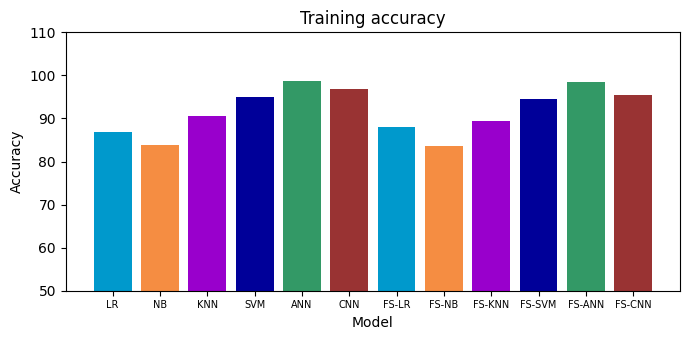

In [407]:
from matplotlib import pyplot as plt
import numpy as np
# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
labels = ('LR','NB','KNN','SVM','ANN','CNN','FS-LR','FS-NB','FS-KNN','FS-SVM','FS-ANN','FS-CNN')
# List of data points
# data = [0, 1, 3, 2, 1, 5, 2, 1, 4, 2, 4, 0]
y_pos = np.arange(len(ls_tr))
print(y_pos)
# y_pos = [0,2,4,6,8,10,12,14,16,18,20,22]
# Plot bar chart with data points
plt.ylim(50,110)
plt.bar(y_pos,ls_tr,color=['#0099cc', '#f58d42', '#9900cc', '#000099', '#339966','#993333'])
plt.xticks(y_pos, labels,fontsize = 7)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training accuracy')
# Display the plot
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11]


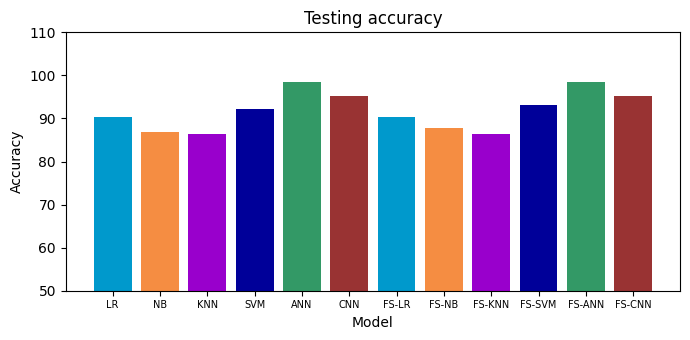

In [408]:
from matplotlib import pyplot as plt
import numpy as np
# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
labels = ('LR','NB','KNN','SVM','ANN','CNN','FS-LR','FS-NB','FS-KNN','FS-SVM','FS-ANN','FS-CNN')
# List of data points
# data = [0, 1, 3, 2, 1, 5, 2, 1, 4, 2, 4, 0]
y_pos = np.arange(len(ls_tr))
print(y_pos)
# y_pos = [0,2,4,6,8,10,12,14,16,18,20,22]
# Plot bar chart with data points
plt.ylim(50,110)
plt.bar(y_pos,ls_te,color=['#0099cc', '#f58d42', '#9900cc', '#000099', '#339966','#993333'])
plt.xticks(y_pos, labels,fontsize = 7)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Testing accuracy')
# Display the plot
plt.show()

In [409]:
# import numpy as np
# import matplotlib.pyplot as plt

# X = ['Group A','Group B','Group C','Group D']
# Ygirls = [10,20,20,40]
# Zboys = [20,30,25,30]

# X_axis = np.arange(len(X))

# plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
# plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')

# plt.xticks(X_axis, X)
# plt.xlabel("Groups")
# plt.ylabel("Number of Students")
# plt.title("Number of Students in each group")
# plt.legend()
# plt.show()
